Multivariate Linear Regression
Mean Squared Error: 0.0002368243626015325
R^2 Score: 0.9999048898142162



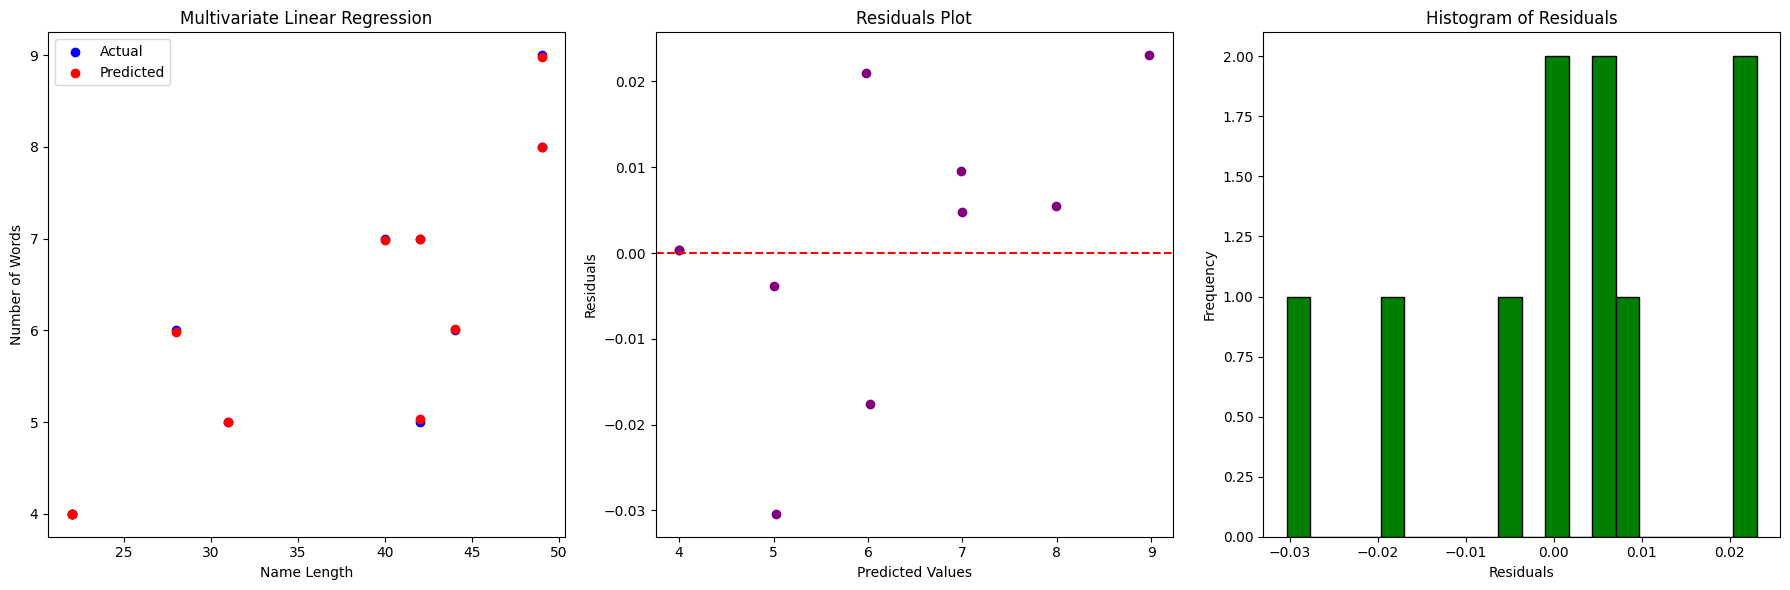

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv('./STTs.csv')

# Hypothetical target: Predicting the number of words in a sentence
data['num_words'] = data['name'].apply(lambda x: len(x.split()))

# Multivariate features: Length of the name, number of words, and a one-hot encoded categorical feature
data['name_length'] = data['name'].apply(len)
# One-Hot Encoding for the categorical feature 'name' if it exists
if 'name' in data.columns:
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(data[['name']])
    X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(['name']))
    data = pd.concat([data, X_encoded_df], axis=1)
# Features and target variable
feature_columns = ['name_length', 'num_words'] + list(X_encoded_df.columns) if 'name' in data.columns else ['name_length', 'num_words']
X_multi = data[feature_columns]
y = data['num_words']

# Split the dataset
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Train the model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Predictions
y_pred_multi = model_multi.predict(X_test_multi)

# Evaluation
print("Multivariate Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test_multi, y_pred_multi))
print("R^2 Score:", r2_score(y_test_multi, y_pred_multi))
print()

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(X_test_multi['name_length'], y_test_multi, color='blue', label='Actual')
plt.scatter(X_test_multi['name_length'], y_pred_multi, color='red', label='Predicted')
plt.xlabel('Name Length')
plt.ylabel('Number of Words')
plt.title('Multivariate Linear Regression')
plt.legend()

plt.subplot(1, 3, 2)
residuals_multi = y_test_multi - y_pred_multi
plt.scatter(y_pred_multi, residuals_multi, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.subplot(1, 3, 3)
plt.hist(residuals_multi, bins=20, color='green', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()